In [86]:
import cv2
import numpy as np
from PIL import Image

In [106]:
cap = cv2.VideoCapture("Анализ бригад (телефон)/Есть телефон/12_52_44.mp4")

In [169]:
cap = cv2.VideoCapture("Анализ бригад (телефон)/Есть телефон/14_53_17.mp4")

In [170]:
success, frame = cap.read()
frames = []
for i in range(10):
    frames.append(frame)
    success, frame = cap.read()

In [184]:
f'start: :{2:02}'

'start: :02'

In [179]:
np.array(frames[0]).std(axis=-1).shape

(1080, 1920)

In [107]:
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

In [167]:
np.zeros((9, 20, 20, 3)).std(axis=-1)

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [126]:
from tqdm import tqdm

def check_grey(path):
    cap = cv2.VideoCapture(path)
    stds = []
    success, frame = cap.read()
    while success:
        stds.append(frame.std(axis=2).mean())
        success, frame = cap.read()
    return stds

In [127]:
grey_stds = check_grey("Анализ бригад (телефон)/Есть телефон/14_53_17.mp4")

In [128]:
gray_stds = np.array(grey_stds)

In [131]:
gray_stds.mean()

1.395902804284403

In [132]:
gray_stds.min()

1.3112137362123595

In [133]:
gray_stds.max()

1.5171139171244774

In [156]:
from PIL import Image, ImageStat
from functools import reduce

MONOCHROMATIC_MAX_VARIANCE = 7
COLOR = 1000
MAYBE_COLOR = 100

def detect_color_image(path):
    cap = cv2.VideoCapture(path)
    success, frame = cap.read()
    vs = []
    while success:
        v = ImageStat.Stat(Image.fromarray(frame)).var
        vs.append(v)
    return vs
    

In [ ]:
def gray_compare(path):
    cap = cv2.VideoCapture(path)
    success, frame = cap.read()
    vs = []
    while success:
        v = ImageStat.Stat(Image.fromarray(frame)).var
        vs.append(v)
    return vs

In [155]:
detect_color_image("Анализ бригад (телефон)/Есть телефон/12_52_44.mp4")

[5063.23566147875, 5038.444349229338, 5229.020608765475]


UnboundLocalError: local variable 'is_monochromatic' referenced before assignment

In [134]:
colored_stds = check_grey("Анализ бригад (телефон)/Есть телефон/12_52_44.mp4")

In [136]:
colored_stds = np.mean(colored_stds)

In [140]:
colored_stds.max()

5.312374893519111

In [141]:
colored_stds.mean()

5.312374893519111

In [139]:
colored_stds.min()

5.312374893519111

In [109]:
colored_frames[0].std(axis=2).mean()

5.423570794065251

In [113]:
frames[0].std(axis=2).mean()

1.4231917318051195

In [123]:
frames[10].std(axis=2).mean()

IndexError: list index out of range

In [ ]:


return diff / (height * width) / (255f * 3f);

In [70]:
model_type = 'DPT_Hybrid'

In [71]:
import torch

midas = torch.hub.load("intel-isl/MiDaS", model_type)

Using cache found in /home/akarpova/.cache/torch/hub/intel-isl_MiDaS_master
/home/akarpova/miniconda3/envs/attention_monitoting/lib/python3.10/site-packages/timm/models/_factory.py:114: UserWarning: Mapping deprecated model name vit_base_resnet50_384 to current vit_base_r50_s16_384.orig_in21k_ft_in1k.
  model = create_fn(
Downloading: "https://github.com/isl-org/MiDaS/releases/download/v3/dpt_hybrid_384.pt" to /home/akarpova/.cache/torch/hub/checkpoints/dpt_hybrid_384.pt
100%|██████████| 470M/470M [00:21<00:00, 22.6MB/s] 


In [72]:
midas.to('cuda')
midas.eval()

DPTDepthModel(
  (pretrained): Module(
    (model): VisionTransformer(
      (patch_embed): HybridEmbed(
        (backbone): ResNetV2(
          (stem): Sequential(
            (conv): StdConv2dSame(3, 64, kernel_size=(7, 7), stride=(2, 2), bias=False)
            (norm): GroupNormAct(
              32, 64, eps=1e-05, affine=True
              (drop): Identity()
              (act): ReLU(inplace=True)
            )
            (pool): MaxPool2dSame(kernel_size=(3, 3), stride=(2, 2), padding=(0, 0), dilation=(1, 1), ceil_mode=False)
          )
          (stages): Sequential(
            (0): ResNetStage(
              (blocks): Sequential(
                (0): Bottleneck(
                  (downsample): DownsampleConv(
                    (conv): StdConv2dSame(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                    (norm): GroupNormAct(
                      32, 256, eps=1e-05, affine=True
                      (drop): Identity()
                      (act): Identit

In [73]:
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform

Using cache found in /home/akarpova/.cache/torch/hub/intel-isl_MiDaS_master


In [84]:
img = cv2.cvtColor(frames[0], cv2.COLOR_BGR2RGB)

input_batch = transform(np.array(frames)).to('cuda')


error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4065: error: (-215:Assertion failed) inv_scale_x > 0 in function 'resize'


In [82]:
cap.release()

In [76]:
with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

output = prediction.cpu().numpy()


In [77]:
img.shape

(1080, 1920, 3)

In [78]:
output.shape

(1080, 1920)

In [62]:
output.max()

781.8624

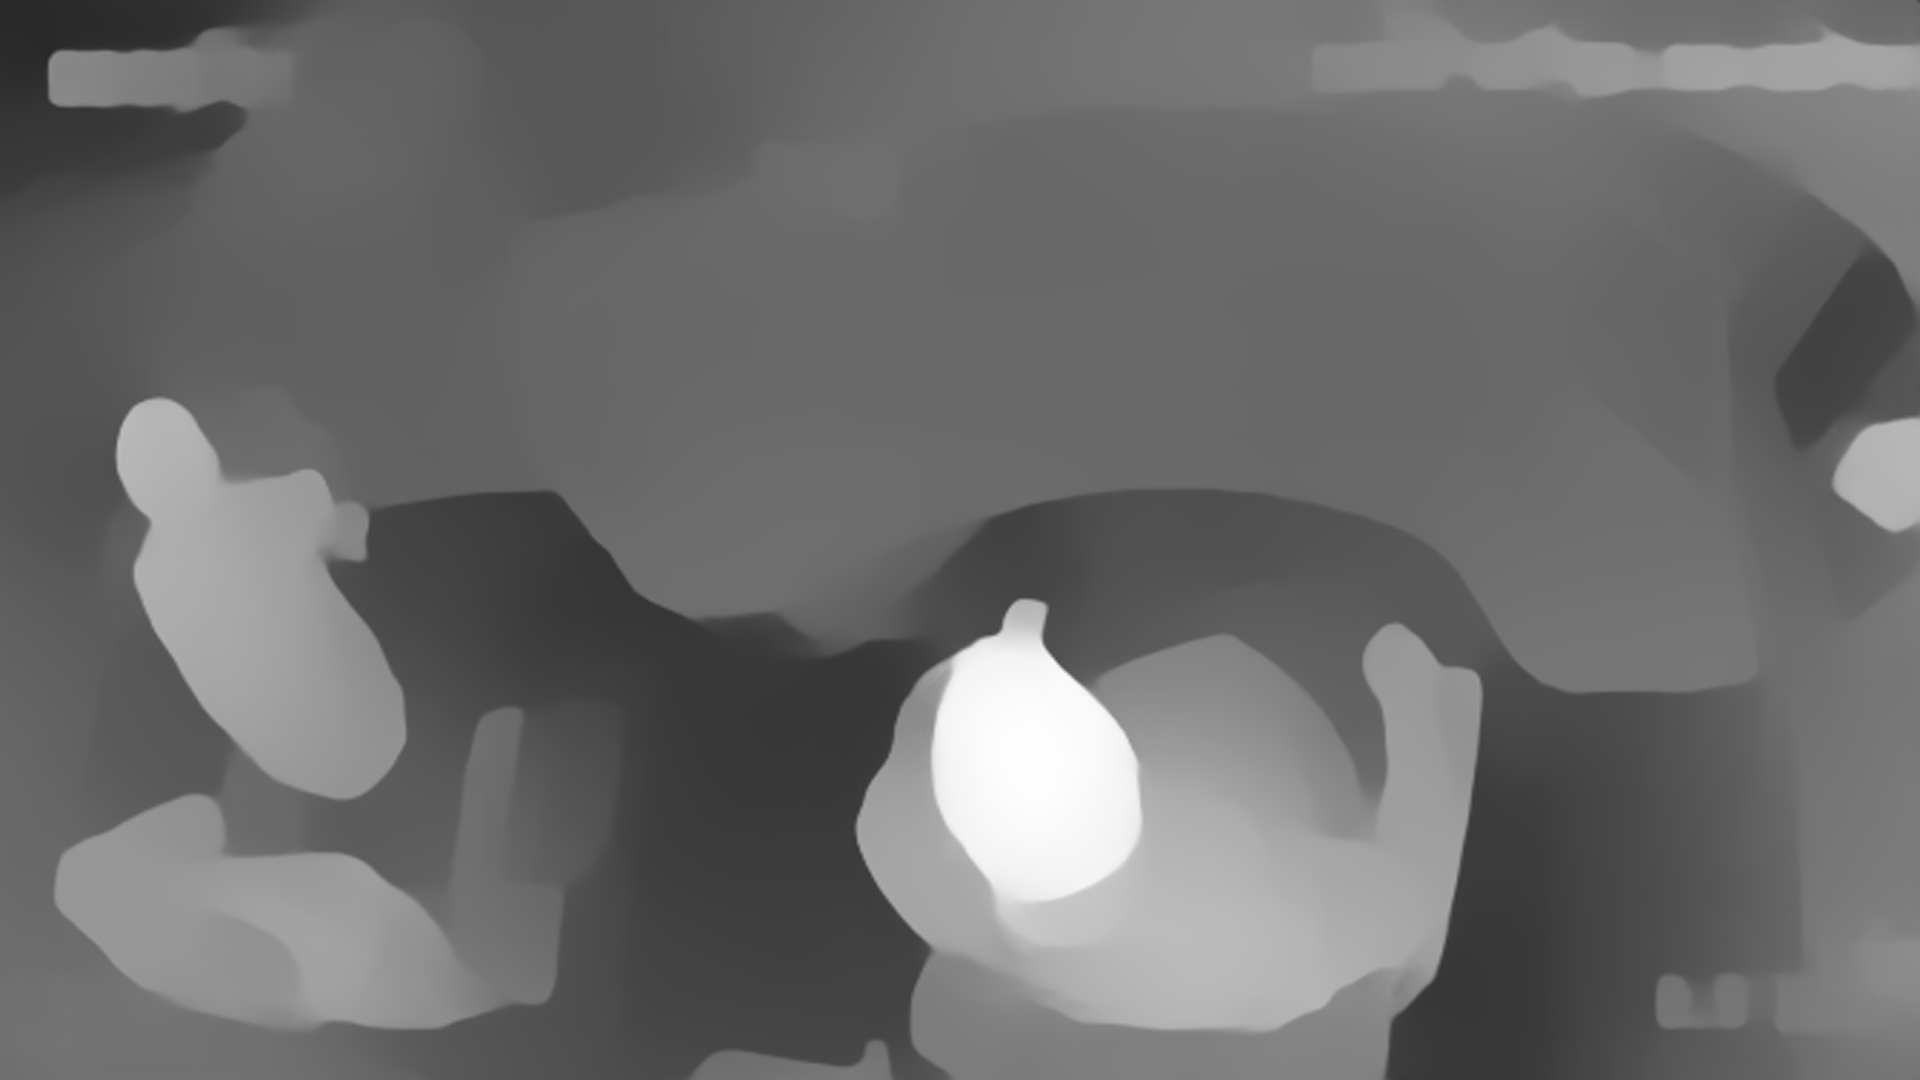

In [79]:
import matplotlib.pyplot as plt
from PIL import Image

Image.fromarray((255 * output / output.max()).astype(np.uint8), mode="L")

In [ ]:
Image.fromarray((255 * output / output.max()).astype(np.uint8), mode="L")

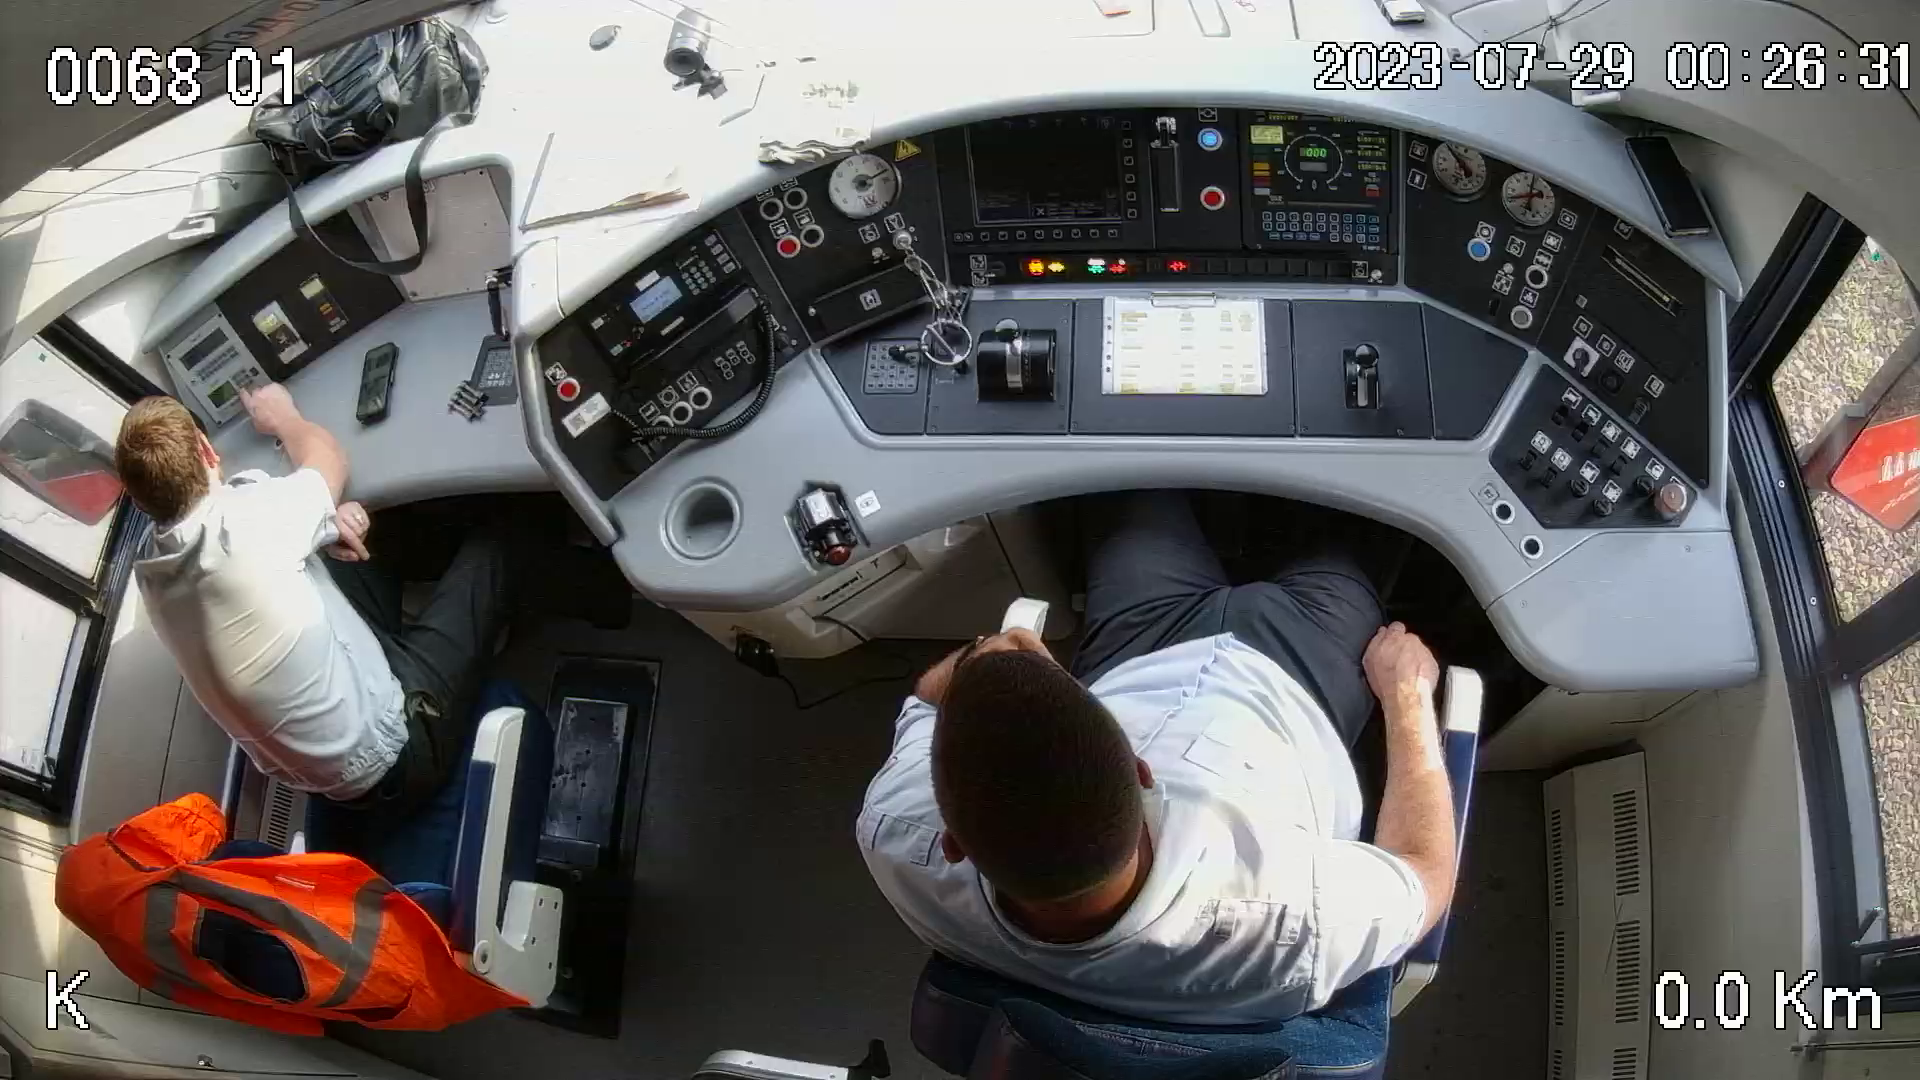

In [80]:
from PIL import Image
Image.fromarray(img)

In [49]:
img.shape

(1080, 1920, 3)

In [7]:
mse = []
for i in range(len(frames)):
    diff = cv2.subtract(frames[i - 1] if i > 0 else frames[-1], frames[i])
    err = np.sum(diff ** 2)
    mse.append(err / (float(frame_height * frame_width)))

In [8]:
np.argsort(mse)[-2]

400

In [20]:
min(mse)

2.5942819251543208

In [9]:
mse[np.argsort(mse)[-2]]

47.949663869598766

In [13]:
from PIL import Image
Image.fromarray(frames[np.argsort(mse)[-2]])

In [19]:
sum(mse) / len(mse)

11.883238677662035

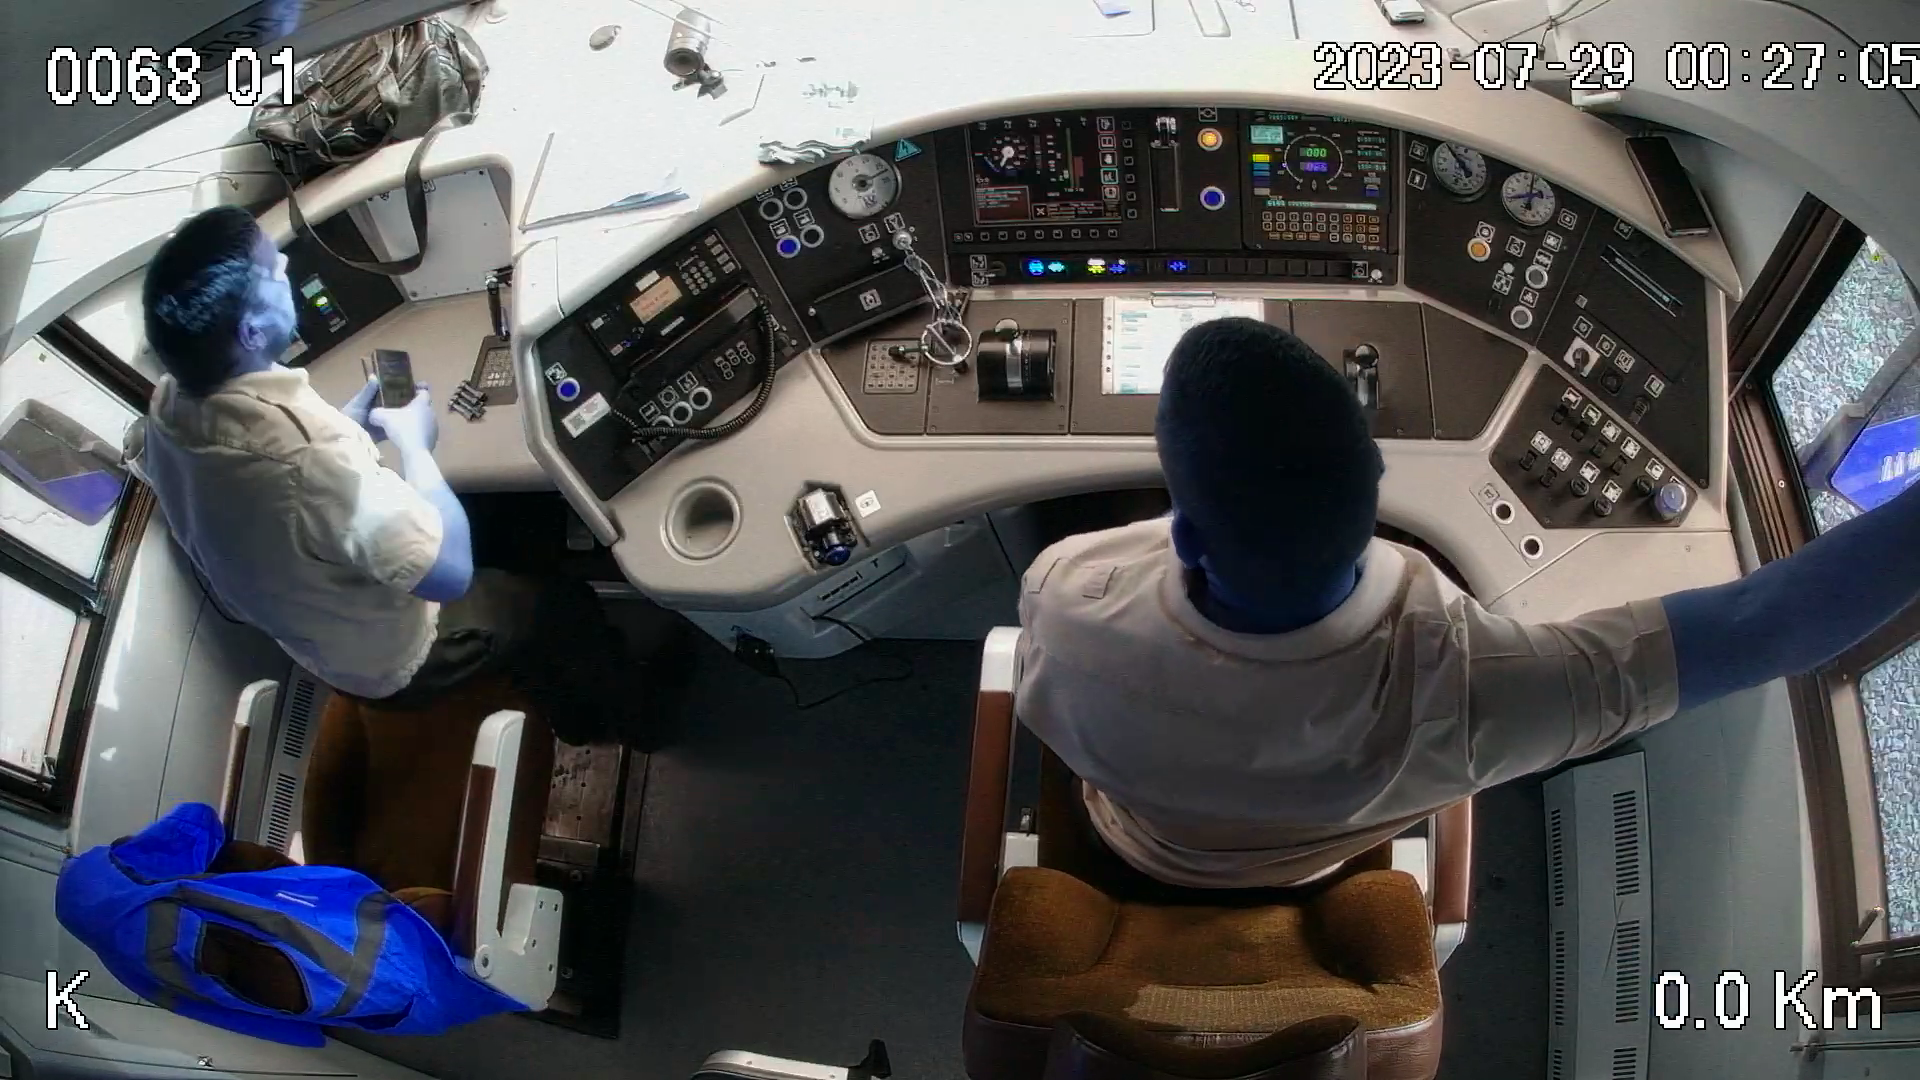

In [18]:
from PIL import Image
Image.fromarray(frames[np.argsort(mse)[-2] - 1], 'RGB')

In [22]:
mse

[40.4755396412037,
 5.908538773148148,
 4.8835271990740745,
 4.731793499228395,
 4.701209490740741,
 4.0273374807098765,
 4.831110146604939,
 4.736023341049383,
 4.651046006944444,
 5.032743537808642,
 3.8779914158950617,
 2.5942819251543208,
 3.271851369598765,
 3.9116295331790125,
 3.3684022955246915,
 3.414388985339506,
 3.6129880401234566,
 5.015629822530864,
 3.4872362075617285,
 3.7956143904320987,
 3.000632716049383,
 2.835226176697531,
 4.098590374228395,
 4.022223668981481,
 3.080017361111111,
 3.249212962962963,
 4.007028838734568,
 4.819129533179012,
 2.9869690393518518,
 3.156577449845679,
 4.285147087191358,
 3.448650173611111,
 4.2294299768518515,
 3.7883077739197533,
 3.243094135802469,
 3.5586140046296295,
 4.478066647376544,
 4.432535204475308,
 4.391812307098766,
 4.114900173611111,
 4.663560956790123,
 4.378849826388889,
 3.2787509645061728,
 4.512583429783951,
 3.1866044560185185,
 4.241556230709876,
 4.856323784722222,
 4.492011477623457,
 3.6879340277777777,
 3.33

In [8]:
def calc_error(frames):
    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))
    for frame in frames:
    
    
    return 

In [4]:
frames

[array([[[ 74,  84,  83],
         [ 74,  84,  83],
         [ 74,  84,  83],
         ...,
         [ 73,  76,  76],
         [ 73,  76,  76],
         [ 73,  76,  76]],
 
        [[ 74,  84,  83],
         [ 74,  84,  83],
         [ 74,  84,  83],
         ...,
         [ 73,  76,  76],
         [ 73,  76,  76],
         [ 73,  76,  76]],
 
        [[ 74,  84,  83],
         [ 74,  84,  83],
         [ 74,  84,  83],
         ...,
         [ 73,  76,  76],
         [ 73,  76,  76],
         [ 73,  76,  76]],
 
        ...,
 
        [[  0,   0,   3],
         [  0,   1,   5],
         [  0,   5,   9],
         ...,
         [ 67,  79,  78],
         [ 67,  79,  78],
         [ 67,  79,  78]],
 
        [[ 32,  40,  44],
         [ 31,  39,  43],
         [ 28,  36,  40],
         ...,
         [ 67,  79,  78],
         [ 67,  79,  78],
         [ 67,  79,  78]],
 
        [[ 95, 103, 107],
         [ 91,  99, 103],
         [ 81,  89,  93],
         ...,
         [ 67,  79,  78],
  

In [ ]:
subprocess.check_call(['ffmpeg', '-an', '-i', "Анализ бригад (телефон)/Есть телефон/00_26_30.mp4", ])